<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Weather_Forecasting_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-01-20 11:27:13--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.197.176, 54.231.227.248, 52.216.245.142, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.197.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  38.8MB/s    in 0.3s    

2024-01-20 11:27:14 (38.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000
mean,989.212508,9.448567,283.491182,4.954011,76.007045,13.575089,9.532524,4.042483,6.021630,9.638982,1216.069883,2.130309,3.532381,174.726164
std,8.359454,8.423685,8.504820,6.730411,16.477126,7.739481,4.183895,4.897270,2.655973,4.235130,39.977065,1.541830,2.340482,86.675965
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.800000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.480000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,14.630000,23.500000,360.000000


In [5]:
import os

In [6]:
fname = os.path.join('/content/jena_climate_2009_2016.csv')

In [7]:
with open(fname) as f:
  data = f.read()

In [8]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [9]:
import numpy as np
temperature = np.zeros((len(lines), ))
raw_data = np.zeros((len(lines), len(header) - 1))

In [10]:
for i, line in enumerate(lines):
  vals = [float(x) for x in line.split(',')[1:]]
  temperature[i] = vals[1]
  raw_data[i, :] = vals[:]

In [11]:
from matplotlib import pyplot as plt

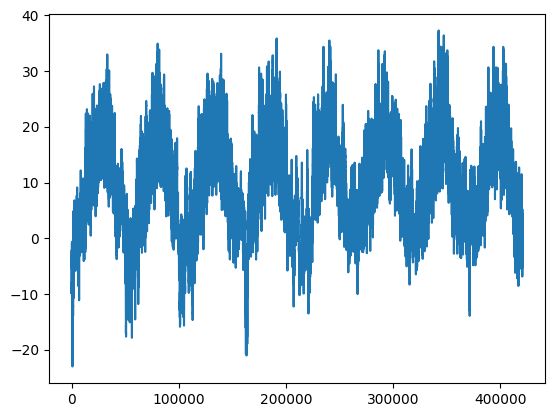

In [12]:
plt.plot(range(len(temperature)), temperature);

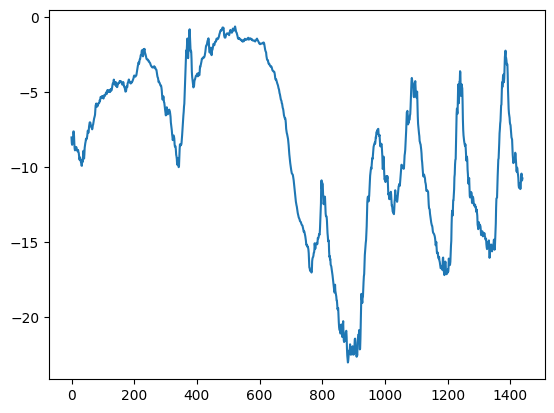

In [13]:
plt.plot(range(1440), temperature[:1440]);

In [14]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = int(0.25 * len(raw_data))

In [15]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [16]:
mean

array([ 988.74929466,    8.82590329,  282.9050718 ,    4.31331863,
         75.87275476,   13.14569946,    9.19414209,    3.95148184,
          5.81050741,    9.30208943, 1218.45204015,    2.14977462,
          3.56048029,  176.4405232 ])

In [17]:
std

array([ 8.50510865,  8.77098361,  8.86560463,  7.08011256, 16.62877917,
        7.6012955 ,  4.14689697,  4.76961017,  2.63277288,  4.1996886 ,
       42.0392747 ,  1.53358803,  2.32305586, 85.85032063])

In [18]:
raw_data[0]

array([ 0.91365151, -1.92064015, -1.97449272, -1.86625827,  1.04801712,
       -1.29131928, -1.46715535, -0.78234525, -1.47012583, -1.4720352 ,
        2.12415558, -0.73016651, -0.77935289, -0.28119316])

# Now we'll use timeseries_dataset_from_array() method.
Here's an example:

In [19]:
import numpy as np
from tensorflow import keras

In [20]:
int_sequence = np.arange(10)

In [21]:
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2
)

In [22]:
for inputs, targets in dummy_dataset:
  for i in range(inputs.shape[0]):
    print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


# **NOW LET'S APPLY IT TO OUR DATA**

In [23]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [24]:
delay

858

In [26]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples
)

In [27]:
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples
)

In [28]:
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples
)

In [29]:
for samples, targets in train_dataset:
  print(samples.shape)
  print(targets.shape)
  break

(256, 120, 14)
(256,)


In [30]:
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
raw_data.shape

(420451, 14)

In [32]:
sequence_length

120

In [33]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(sequence_length, raw_data.shape[-1])),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1680)              0         
                                                                 
 dense (Dense)               (None, 16)                26896     
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26913 (105.13 KB)
Trainable params: 26913 (105.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


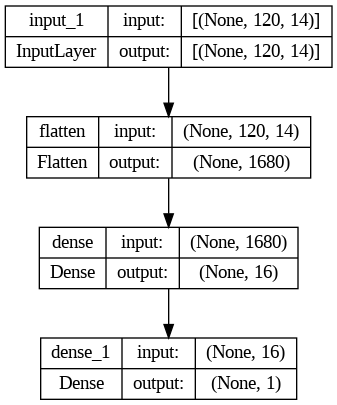

In [36]:
keras.utils.plot_model(model, show_shapes=True)

In [37]:
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint('cps', save_best_only=True)
]

In [39]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
819/819 [==============================] - 31s 37ms/step - loss: 12.8440 - mae: 2.7746 - val_loss: 11.8049 - val_mae: 2.7064
Epoch 2/10
819/819 [==============================] - 30s 37ms/step - loss: 9.1520 - mae: 2.3776 - val_loss: 12.0966 - val_mae: 2.7555
Epoch 3/10
819/819 [==============================] - 31s 38ms/step - loss: 8.4411 - mae: 2.2822 - val_loss: 10.4900 - val_mae: 2.5463
Epoch 4/10
819/819 [==============================] - 31s 38ms/step - loss: 7.9499 - mae: 2.2130 - val_loss: 10.3422 - val_mae: 2.5426
Epoch 5/10
819/819 [==============================] - 31s 37ms/step - loss: 7.5764 - mae: 2.1592 - val_loss: 10.7567 - val_mae: 2.5946
Epoch 6/10
819/819 [==============================] - 30s 37ms/step - loss: 7.3379 - mae: 2.1246 - val_loss: 10.4487 - val_mae: 2.5482
Epoch 7/10
819/819 [==============================] - 30s 37ms/step - loss: 7.0767 - mae: 2.0895 - val_loss: 10.4465 - val_mae: 2.5468
Epoch 8/10
819/819 [==============================] - 

In [40]:
model = keras.models.load_model('cps')

In [41]:
model.evaluate(test_dataset)

405/405 [==============================] - 10s 24ms/step - loss: 11.5879 - mae: 2.6918


[11.58791446685791, 2.6918420791625977]

In [42]:
import matplotlib.pyplot as plt

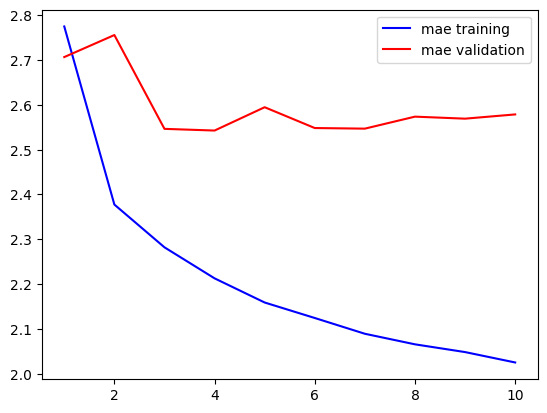

In [43]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='mae training')
plt.plot(epochs, val_loss, 'r', label='mae validation')
plt.legend()
plt.show();

**-IS IT BAD?** <br>
**-IT'S BAD AS F...**

# WE CAN USE CNNs
And it's not a joke

The thing is that CNNs are not something special. They are built of Convolutional layers, and till this moment I've been using only Conv2D.
It's a sliding box that processes parts of the information, but there's also Conv1D and Conv3D. <br>
Here we'll be using Conv1D, as our data is 1 dimensional.

<img src='https://jinglescode.github.io/assets/img/posts/how-convolutional-layers-work-deep-learning-neural-networks-02.gif' width=60%>

In [46]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(sequence_length, raw_data.shape[-1])),
    layers.Conv1D(filters=8, kernel_size=24, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=8, kernel_size=12, activation='relu'),
    layers.MaxPool1D(pool_size=2),
    layers.Conv1D(filters=8, kernel_size=6, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1)
])

In [47]:
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 97, 8)             2696      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 48, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 37, 8)             776       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 18, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 8)             392       
                                                                 
 global_average_pooling1d_1  (None, 8)                

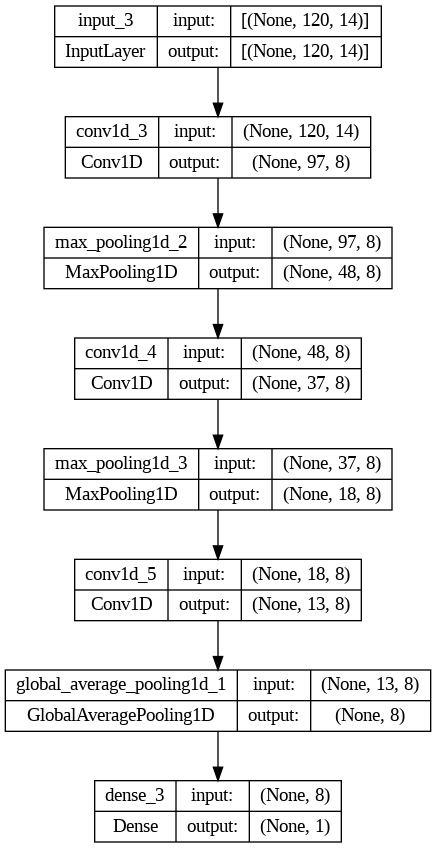

In [50]:
keras.utils.plot_model(model, show_shapes=True)

In [51]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
819/819 [==============================] - 45s 54ms/step - loss: 19.9178 - mae: 3.5061 - val_loss: 16.2123 - val_mae: 3.2006
Epoch 2/10
819/819 [==============================] - 44s 54ms/step - loss: 14.6566 - mae: 3.0379 - val_loss: 15.1675 - val_mae: 3.1038
Epoch 3/10
819/819 [==============================] - 46s 56ms/step - loss: 13.3583 - mae: 2.8926 - val_loss: 14.4792 - val_mae: 3.0034
Epoch 4/10
819/819 [==============================] - 46s 56ms/step - loss: 12.6056 - mae: 2.8081 - val_loss: 13.8001 - val_mae: 2.9338
Epoch 5/10
819/819 [==============================] - 45s 55ms/step - loss: 12.0444 - mae: 2.7383 - val_loss: 14.8927 - val_mae: 3.0384
Epoch 6/10
819/819 [==============================] - 45s 55ms/step - loss: 11.6592 - mae: 2.6939 - val_loss: 14.3952 - val_mae: 2.9773
Epoch 7/10
819/819 [==============================] - 46s 56ms/step - loss: 11.2869 - mae: 2.6506 - val_loss: 14.2012 - val_mae: 2.9681
Epoch 8/10
819/819 [============================

In [ ]:
model = keras.models.load_model('cps')

In [53]:
model.evaluate(test_dataset)

405/405 [==============================] - 10s 24ms/step - loss: 11.5879 - mae: 2.6918


[11.587908744812012, 2.691843032836914]

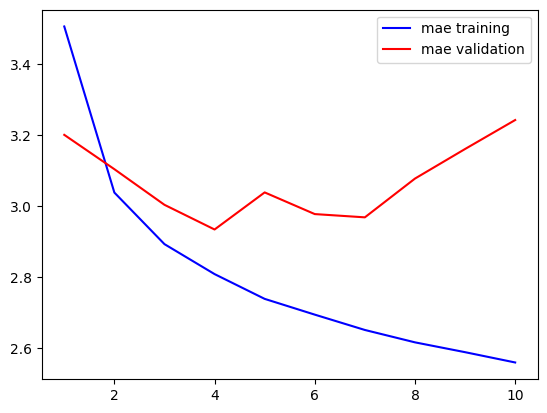

In [54]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='mae training')
plt.plot(epochs, val_loss, 'r', label='mae validation')
plt.legend()
plt.show();

# **Nah, it's even worse...**

So... Is there anything that can help us? <br>
# **HELL YEAH!**
___
R E C U R R E N T <br>
N E U R A L <br>
N E T W O R K S <br>

In [55]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(sequence_length, raw_data.shape[-1])),
    layers.LSTM(16),
    layers.Dense(1)
])

In [56]:
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

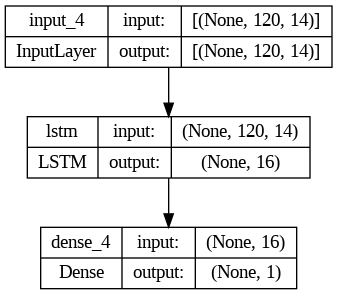

In [57]:
keras.utils.plot_model(model, show_shapes=True)

In [58]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
819/819 [==============================] - 57s 68ms/step - loss: 38.8578 - mae: 4.5291 - val_loss: 12.5180 - val_mae: 2.7185
Epoch 2/10
819/819 [==============================] - 57s 69ms/step - loss: 10.8358 - mae: 2.5603 - val_loss: 9.7420 - val_mae: 2.4359
Epoch 3/10
819/819 [==============================] - 59s 71ms/step - loss: 9.6861 - mae: 2.4272 - val_loss: 9.5491 - val_mae: 2.4109
Epoch 4/10
819/819 [==============================] - 59s 72ms/step - loss: 9.2258 - mae: 2.3688 - val_loss: 9.4857 - val_mae: 2.4028
Epoch 5/10
819/819 [==============================] - 56s 68ms/step - loss: 8.9383 - mae: 2.3321 - val_loss: 9.6880 - val_mae: 2.4160
Epoch 6/10
819/819 [==============================] - 55s 67ms/step - loss: 8.7466 - mae: 2.3080 - val_loss: 9.6653 - val_mae: 2.4195
Epoch 7/10
819/819 [==============================] - 57s 69ms/step - loss: 8.5705 - mae: 2.2858 - val_loss: 9.7364 - val_mae: 2.4224
Epoch 8/10
819/819 [==============================] - 56s 6

In [60]:
model = keras.models.load_model('cps')

In [61]:
model.evaluate(test_dataset)

405/405 [==============================] - 14s 33ms/step - loss: 10.4211 - mae: 2.5363


[10.421062469482422, 2.536309003829956]

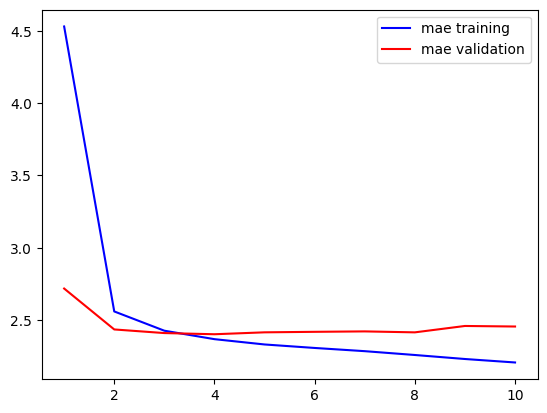

In [62]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='mae training')
plt.plot(epochs, val_loss, 'r', label='mae validation')
plt.legend()
plt.show();

In [63]:
y_pred = model.predict(test_dataset)

405/405 [==============================] - 14s 34ms/step


In [64]:
y_pred[0]

array([13.226864], dtype=float32)

# To sum up we have 2.4 degree miss in common